- The ground truth values for this competition are yearly Aboveground Biomass (AGBM) measured in tonnes. Labels for each patch are derived from LiDAR (Light Detection and Ranging), a remote sensing technology that provides 3D information about the terrain and vegetation. **The label for each patch is the peak biomass value measured during the summer.**

- You must submit your predictions in the form of single-band 256 x 256 tif images, zipped into a single file. The lone band should contain your predictions for the yearly AGBM for that chip.

In [1]:
import pandas as pd
import os
from tqdm import tqdm

In [2]:
features_df = pd.read_csv('/home/ubuntu/Thesis/backup_data/bioMass_data/features_metadata.csv')
print(features_df.shape)
features_df.head()

(252426, 11)


,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif


In [3]:
features_df[features_df.c]

train    189078
test      63348
Name: split, dtype: int64

In [4]:
features_df.cksum.describe()

count    2.524260e+05
mean     2.147399e+09
std      1.236083e+09
min      1.043000e+04
25%      1.080137e+09
50%      2.153997e+09
75%      3.215310e+09
max      4.294945e+09
Name: cksum, dtype: float64

In [5]:
features_df.satellite.value_counts(normalize=True)

S1    0.544888
S2    0.455112
Name: satellite, dtype: float64

In [6]:
features_df.split.value_counts(normalize=True)

train    0.749043
test     0.250957
Name: split, dtype: float64

In [9]:
features_df.groupby('split').month.value_counts(normalize=True)

split  month    
test   April        0.087548
       August       0.087548
       February     0.087548
       July         0.087548
       June         0.087548
       March        0.087548
       May          0.087548
       October      0.087548
       September    0.087548
       November     0.082607
       January      0.077177
       December     0.052283
train  April        0.091909
       August       0.091909
       July         0.091909
       June         0.091909
       May          0.091909
       March        0.089170
       February     0.082236
       October      0.082236
       September    0.082236
       November     0.078327
       January      0.073679
       December     0.052571
Name: month, dtype: float64

In [13]:
features_df.chip_id.value_counts()

4e971fe6    24
2637f129    24
4ae8ba78    24
4ae23e7e    24
25fd4e5d    24
            ..
2ea0ef6d    17
8d5a3529    17
8dc07f56    17
8e44492d    17
acc68305    17
Name: chip_id, Length: 11462, dtype: int64

In [14]:
features_df[features_df.chip_id=='2ea0ef6d']

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
45364,2ea0ef6d_S1_00.tif,2ea0ef6d,S1,train,September,1049524,2993414183,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45365,2ea0ef6d_S1_01.tif,2ea0ef6d,S1,train,October,1049524,2182999664,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45366,2ea0ef6d_S1_02.tif,2ea0ef6d,S1,train,November,1049524,1798134980,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45367,2ea0ef6d_S1_03.tif,2ea0ef6d,S1,train,December,1049524,2338247391,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45368,2ea0ef6d_S1_04.tif,2ea0ef6d,S1,train,January,1049524,496685829,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45369,2ea0ef6d_S1_05.tif,2ea0ef6d,S1,train,February,1049524,1129146039,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45370,2ea0ef6d_S1_06.tif,2ea0ef6d,S1,train,March,1049524,3183011467,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45371,2ea0ef6d_S1_07.tif,2ea0ef6d,S1,train,April,1049524,1128835895,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45372,2ea0ef6d_S1_08.tif,2ea0ef6d,S1,train,May,1049524,3757148111,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif
45373,2ea0ef6d_S1_09.tif,2ea0ef6d,S1,train,June,1049524,2961865284,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,2ea0ef6d_agbm.tif


In [22]:
agbm_df = pd.read_csv('/home/ubuntu/Thesis/backup_data/bioMass_data/train_agbm_metadata.csv')
print(agbm_df.shape)
agbm_df.head()

(8689, 7)


,filename,chip_id,size,cksum,s3path_us,s3path_eu,s3path_as
0,0003d2eb_agbm.tif,0003d2eb,262482,2036246549,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
1,000aa810_agbm.tif,000aa810,262482,2858468457,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
2,000d7e33_agbm.tif,000d7e33,262482,277850822,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
3,00184691_agbm.tif,00184691,262482,3502312579,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...
4,001b0634_agbm.tif,001b0634,262482,2397957274,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...


In [23]:
agbm_df.chip_id.value_counts()

0003d2eb    1
aa2c23a4    1
aabb7449    1
aab66d6a    1
aab51037    1
           ..
56402961    1
56400043    1
562d07cb    1
562c8385    1
fff05995    1
Name: chip_id, Length: 8689, dtype: int64

# Download one chip

In [139]:
def download_train_tif(chip_id, satellite, month_name, size, cksum):
    
    month_dict = {'September':'00',
                  'October':'01',
                  'November':'02',
                  'December':'03',
                  'January':'04',
                  'February':'05',
                  'March':'06',
                  'April':'07',
                  'May':'08',
                  'June':'09',
                  'July':'10',
                  'August':'11',
                 }
    
    month_code = month_dict[month_name]
    
    filename = '_'.join([chip_id, satellite, month_code])+'.tif'
    local_file = '/home/ubuntu/Thesis/backup_data/bioMass_data/train_features/'+filename

    if not os.path.exists(local_file): 
        s3_path = 's3://drivendata-competition-biomassters-public-eu/train_features/'
        os.system('aws s3 cp %s /home/ubuntu/Thesis/backup_data/bioMass_data/train_features/ --no-sign-request' %(s3_path+filename))
    else:
        # print('File already exists, skipping...')
        pass

    local_cksum = os.popen('cksum %s' %local_file).read().replace('\n', '')
    expected_cksum = ' '.join([str(cksum), str(size), local_file])

    if expected_cksum!=local_cksum:
        print(local_cksum)
        print(expected_cksum)
        
        print('cksum did not match. Downloading again...')
        s3_path = 's3://drivendata-competition-biomassters-public-eu/train_features/'
        os.system('aws s3 cp %s /home/ubuntu/Thesis/backup_data/bioMass_data/train_features/ --no-sign-request' %(s3_path+filename))
        local_cksum = os.popen('cksum %s' %local_file).read()
        assert expected_cksum==local_cksum
    
    return local_file

def download_train_agbm(chip_id, size, cksum):
    
    filename = '_'.join([chip_id, 'agbm'])+'.tif'
    local_file = '/home/ubuntu/Thesis/backup_data/bioMass_data/train_agbm/'+filename
    
    if not os.path.exists(local_file): 
        s3_path = 's3://drivendata-competition-biomassters-public-eu/train_agbm/'
        os.system('aws s3 cp %s /home/ubuntu/Thesis/backup_data/bioMass_data/train_agbm/ --no-sign-request' %(s3_path+filename))
    else:
        # print('File already exists, skipping...')
        pass

    local_cksum = os.popen('cksum %s' %local_file).read().replace('\n', '')
    
    expected_cksum = ' '.join([str(cksum), str(size), local_file])

    if expected_cksum!=local_cksum:
        print(local_cksum)
        print(expected_cksum)
        print('cksum did not match. Downloading again...')
        s3_path = 's3://drivendata-competition-biomassters-public-eu/train_agbm/'
        os.system('aws s3 cp %s /home/ubuntu/Thesis/backup_data/bioMass_data/train_agbm/ --no-sign-request' %(s3_path+filename))
        local_cksum = os.popen('cksum %s' %local_file).read()
        assert expected_cksum==local_cksum
    
    return local_file

In [65]:
train_df = features_df[features_df.split=='train']
print(train_df.shape)
train_df.head(15)

(189078, 11)


,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
0,0003d2eb_S1_00.tif,0003d2eb,S1,train,September,1049524,3953454613,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
1,0003d2eb_S1_01.tif,0003d2eb,S1,train,October,1049524,3531005382,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
2,0003d2eb_S1_02.tif,0003d2eb,S1,train,November,1049524,1401197002,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
3,0003d2eb_S1_03.tif,0003d2eb,S1,train,December,1049524,3253084255,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
4,0003d2eb_S1_04.tif,0003d2eb,S1,train,January,1049524,2467836265,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
5,0003d2eb_S1_05.tif,0003d2eb,S1,train,February,1049524,2955837881,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
6,0003d2eb_S1_06.tif,0003d2eb,S1,train,March,1049524,938913233,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
7,0003d2eb_S1_07.tif,0003d2eb,S1,train,April,1049524,225964894,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
8,0003d2eb_S1_08.tif,0003d2eb,S1,train,May,1049524,135181958,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif
9,0003d2eb_S1_09.tif,0003d2eb,S1,train,June,1049524,2451157738,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,0003d2eb_agbm.tif


In [141]:
selected_chip = train_df[(train_df.chip_id=='0003d2eb') & (train_df.month=='June')]

for idx, row in tqdm(list(selected_chip.iterrows())):
    chip_path = download_train_tif(row.chip_id, row.satellite, row.month, row['size'], row.cksum)
    
    corresponding_agbm = agbm_df[agbm_df.chip_id==row.chip_id]
    
    assert len(corresponding_agbm)==1
    
    aux_filename, aux_chip_id, aux_size, aux_cksum = corresponding_agbm.values[0][0:4]
    agbm_path = download_train_agbm(row.chip_id, aux_size, aux_cksum)

100%|█████████████████████████████████████| 2/2 [00:00<00:00, 19.31it/s]


# EDA one chip

- The following 11 bands are provided for each S2 image: B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12, and CLP (a cloud probability layer). See the Sentinel-2 guide for a description of each band.

- Normalized Difference Index: B5 − B4/B5 + B4

## 0003d2eb on June

### S2

In [163]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

selected_chip = train_df[(train_df.chip_id=='0003d2eb') & (train_df.month=='June') & (train_df.satellite=='S2')]

for idx, row in tqdm(list(selected_chip.iterrows())):
    chip_path = download_train_tif(row.chip_id, row.satellite, row.month, row['size'], row.cksum)
    
    corresponding_agbm = agbm_df[agbm_df.chip_id==row.chip_id]
    
    assert len(corresponding_agbm)==1
    
    aux_filename, aux_chip_id, aux_size, aux_cksum = corresponding_agbm.values[0][0:4]
    agbm_path = download_train_agbm(row.chip_id, aux_size, aux_cksum)

chip = io.imread(chip_path)
chip = np.moveaxis(chip, -1, 0)

agbm = io.imread(agbm_path)

(array([55114.,  7644.,  1370.,   438.,   237.,   201.,   196.,   121.,
          122.,    93.]),
 array([  27. ,  545.9, 1064.8, 1583.7, 2102.6, 2621.5, 3140.4, 3659.3,
        4178.2, 4697.1, 5216. ]),
 <BarContainer object of 10 artists>)

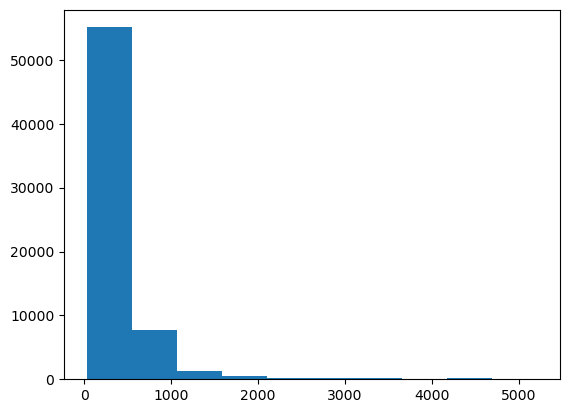

In [165]:
plt.hist(chip[0].flatten())

In [143]:
chip.shape, agbm.shape

((256, 256, 11), (256, 256))

In [158]:
NDI = chip[3] - chip[2]/chip[3] + chip[2]

(array([33616., 22259.,  7578.,   956.,   327.,   213.,   228.,   125.,
          140.,    94.]),
 array([   31.8       ,  1071.92798675,  2112.0559735 ,  3152.18396025,
         4192.311947  ,  5232.43993375,  6272.5679205 ,  7312.69590725,
         8352.823894  ,  9392.95188075, 10433.0798675 ]),
 <BarContainer object of 10 artists>)

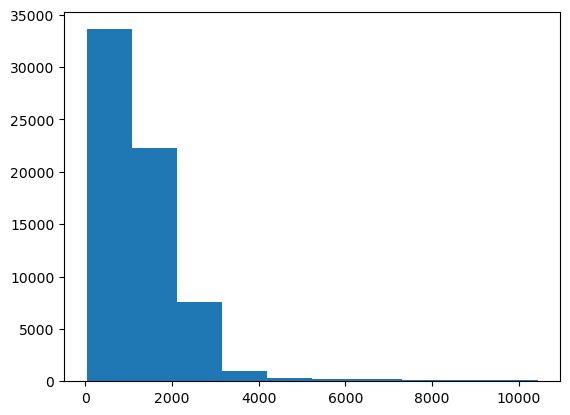

In [166]:
plt.hist(NDI.flatten())

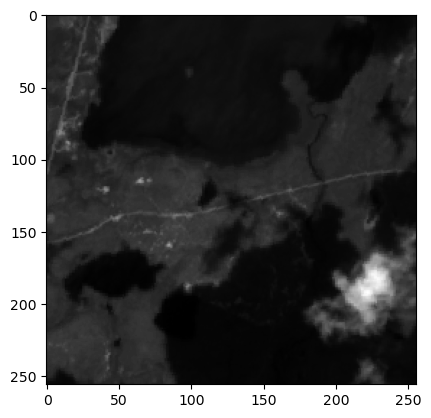

In [160]:
plt.imshow(NDI,cmap='gray')

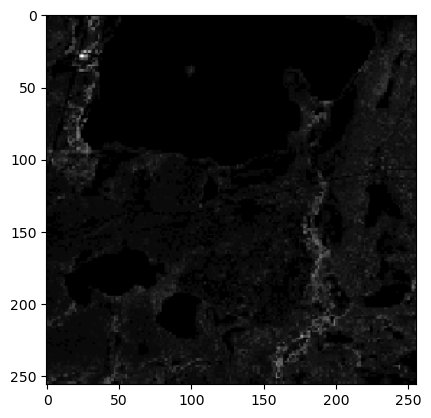

In [145]:
plt.imshow(agbm,cmap='gray')

In [176]:
data_df = pd.DataFrame(chip.reshape((11, 256*256)).T,
                       columns=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'CLP'])

data_df['ndi'] = NDI.flatten()
data_df['agbm'] = agbm.flatten()


data_df.head()

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,CLP,ndi,agbm
0,356,526,678,1231,1973,2272,2666,2696,2814,1575,1,1908.449228,6.73
1,376,547,684,1194,2002,2285,2756,2805,2775,1552,1,1877.427136,6.73
2,435,563,713,1222,1909,2227,2508,2652,2909,1690,1,1934.416530,6.53
3,423,579,679,1187,1976,2271,2514,2639,2891,1658,2,1865.427970,6.53
4,418,580,669,1187,1976,2271,2532,2639,2891,1658,1,1855.436394,8.12


In [190]:
data_df.describe()

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,CLP,ndi,agbm
count,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000
mean,395.144257,472.199707,488.914383,784.146591,1143.191513,1267.224319,1376.955887,1400.468658,1331.864090,818.521088,6.970184,1272.432816,5.822261
std,457.927140,468.973637,489.600387,616.094994,926.699476,1018.792511,1133.436478,1166.604628,1162.351109,781.560560,16.444103,1087.155975,7.124192
min,27.000000,1.000000,10.000000,14.000000,1.000000,1.000000,8.000000,1.000000,26.000000,13.000000,0.000000,31.800000,0.000000
25%,183.000000,193.000000,195.000000,280.000000,268.000000,272.000000,242.000000,179.000000,169.000000,114.000000,1.000000,476.368867,0.000000
50%,285.000000,354.000000,348.000000,609.000000,912.000000,1025.000000,1069.000000,1120.000000,1033.000000,585.500000,2.000000,968.767758,5.270000
75%,443.000000,605.000000,646.000000,1206.000000,2015.000000,2253.000000,2478.000000,2566.000000,2457.000000,1408.000000,5.000000,1845.527911,8.720000
max,5216.000000,5028.000000,5064.000000,5434.000000,5606.000000,5513.000000,5912.000000,5641.000000,5493.000000,5486.000000,100.000000,10433.079868,130.339996


In [179]:
data_df.corr()[['agbm', 'B7']]

,agbm,B7
B2,0.073622,0.567310
B3,0.115759,0.709302
B4,0.071469,0.725166
B5,0.160130,0.909381
B6,0.288763,0.996534
B7,0.293313,1.000000
B8,0.290795,0.966740
B8A,0.292000,0.995772
B11,0.240966,0.973508
B12,0.201011,0.942881


<AxesSubplot: xlabel='B7', ylabel='agbm'>

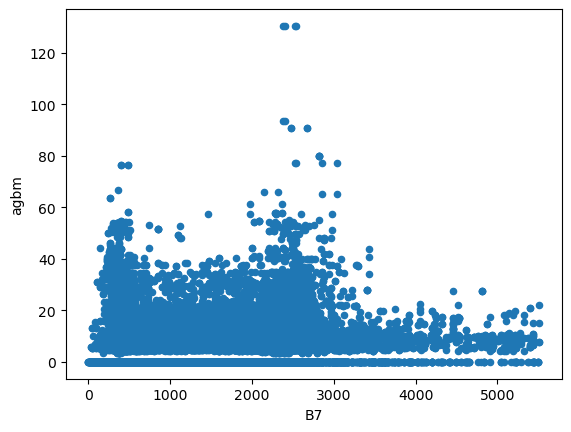

In [180]:
data_df.plot.scatter('B7', 'agbm')

### S1

In [198]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

selected_chip = train_df[(train_df.chip_id=='0003d2eb') & (train_df.month=='June') & (train_df.satellite=='S1')]

for idx, row in tqdm(list(selected_chip.iterrows())):
    chip_path = download_train_tif(row.chip_id, row.satellite, row.month, row['size'], row.cksum)
    
    corresponding_agbm = agbm_df[agbm_df.chip_id==row.chip_id]
    
    assert len(corresponding_agbm)==1
    
    aux_filename, aux_chip_id, aux_size, aux_cksum = corresponding_agbm.values[0][0:4]
    agbm_path = download_train_agbm(row.chip_id, aux_size, aux_cksum)

chip = io.imread(chip_path)
chip = np.moveaxis(chip, -1, 0)

agbm = io.imread(agbm_path)

100%|█████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]


(array([9.4200e+02, 1.2942e+04, 3.6040e+03, 2.0970e+03, 8.6900e+03,
        1.7656e+04, 1.7071e+04, 2.4720e+03, 5.6000e+01, 6.0000e+00]),
 array([-21.19372559, -19.53012657, -17.86652756, -16.20292854,
        -14.53932858, -12.87572956, -11.21213055,  -9.54853153,
         -7.88493252,  -6.22133303,  -4.55773401]),
 <BarContainer object of 10 artists>)

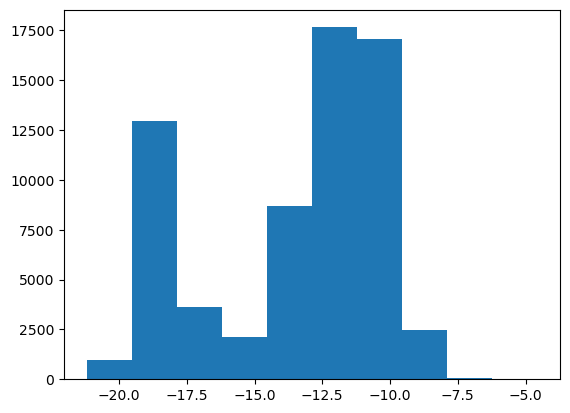

In [199]:
plt.hist(chip[0].flatten())

In [202]:
chip.shape, agbm.shape

((4, 256, 256), (256, 256))

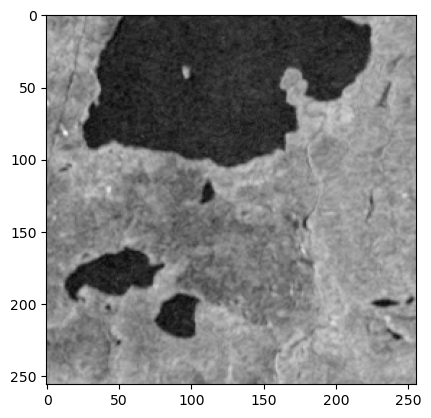

In [203]:
plt.imshow(chip[0],cmap='gray')

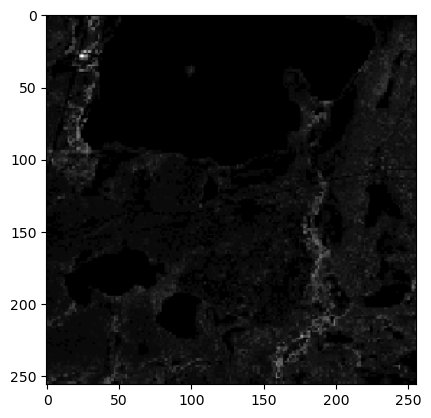

In [204]:
plt.imshow(agbm,cmap='gray')

In [206]:
data_df = pd.DataFrame(chip.reshape((4, 256*256)).T,
                       columns=['VVu', 'VHu', 'VVd', 'VHd'])

data_df['agbm'] = agbm.flatten()


data_df.head()

,VVu,VHu,VVd,VHd,agbm
0,-10.456742,-17.235430,-11.107721,-16.092058,6.73
1,-11.203355,-17.439400,-11.064857,-16.374502,6.73
2,-11.726201,-18.142166,-11.686905,-17.060448,6.53
3,-12.321516,-18.027805,-12.242922,-17.521753,6.53
4,-12.488599,-18.173048,-11.623562,-17.307837,8.12


In [207]:
data_df.describe()

,VVu,VHu,VVd,VHd,agbm
count,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000
mean,-13.503963,-21.825722,-13.559116,-22.145720,5.822261
std,3.243259,5.923592,3.051268,5.900227,7.124192
min,-21.193726,-38.894047,-21.515696,-39.034447,0.000000
25%,-17.354266,-28.206958,-16.868512,-28.056286,0.000000
50%,-12.345639,-19.157786,-12.590613,-19.523466,5.270000
75%,-10.982684,-17.465452,-11.263054,-17.870178,8.720000
max,-4.557734,-13.132298,-3.878109,-7.061483,130.339996


In [209]:
data_df.corr()[['agbm']]

,agbm
VVu,0.527046
VHu,0.547170
VVd,0.538285
VHd,0.549303
agbm,1.000000


<AxesSubplot: xlabel='VVu', ylabel='agbm'>

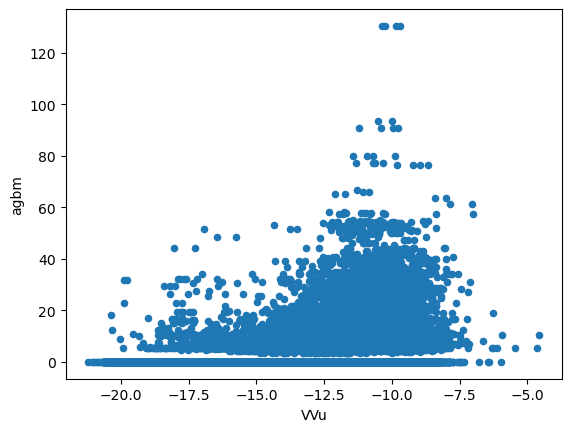

In [210]:
data_df.plot.scatter('VVu', 'agbm')

## 00efbedd on June

### S2

In [211]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

selected_chip = train_df[(train_df.chip_id=='00efbedd') & (train_df.month=='June') & (train_df.satellite=='S2')]

for idx, row in tqdm(list(selected_chip.iterrows())):
    chip_path = download_train_tif(row.chip_id, row.satellite, row.month, row['size'], row.cksum)
    
    corresponding_agbm = agbm_df[agbm_df.chip_id==row.chip_id]
    
    assert len(corresponding_agbm)==1
    
    aux_filename, aux_chip_id, aux_size, aux_cksum = corresponding_agbm.values[0][0:4]
    agbm_path = download_train_agbm(row.chip_id, aux_size, aux_cksum)

chip = io.imread(chip_path)
chip = np.moveaxis(chip, -1, 0)

agbm = io.imread(agbm_path)

100%|█████████████████████████████████████| 1/1 [00:00<00:00,  6.56it/s]


In [187]:
selected_chip

,filename,chip_id,satellite,split,month,size,cksum,s3path_us,s3path_eu,s3path_as,corresponding_agbm
762,00efbedd_S1_09.tif,00efbedd,S1,train,June,1049524,4131050861,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,00efbedd_agbm.tif
773,00efbedd_S2_09.tif,00efbedd,S2,train,June,1443550,564933962,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,s3://drivendata-competition-biomassters-public...,00efbedd_agbm.tif


(array([    0.,     0.,     0.,     0.,     0., 65536.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

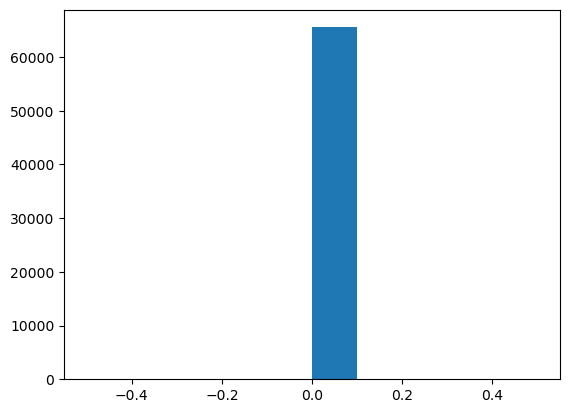

In [184]:
plt.hist(chip[0].flatten())

(array([4.1605e+04, 8.8560e+03, 6.9670e+03, 3.9930e+03, 2.0180e+03,
        1.1040e+03, 5.8900e+02, 2.5300e+02, 1.3500e+02, 1.6000e+01]),
 array([  0.        ,  48.31400299,  96.62800598, 144.94200134,
        193.25601196, 241.57000732, 289.88400269, 338.19799805,
        386.51202393, 434.82601929, 483.14001465]),
 <BarContainer object of 10 artists>)

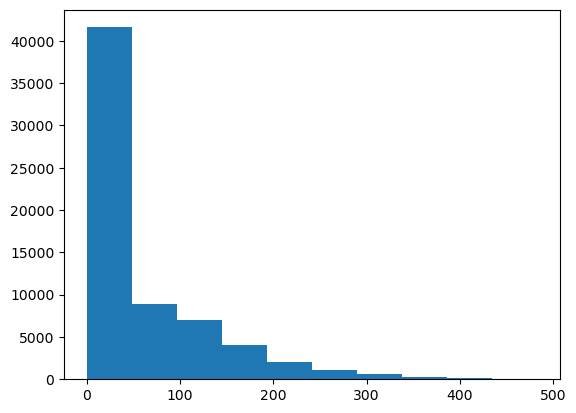

In [196]:
plt.hist(agbm.flatten())

In [185]:
chip.shape, agbm.shape

((11, 256, 256), (256, 256))

In [188]:
NDI = chip[3] - chip[2]/chip[3] + chip[2]

/tmp/ipykernel_4010048/3201213718.py:1: RuntimeWarning: invalid value encountered in divide
  NDI = chip[3] - chip[2]/chip[3] + chip[2]


/home/ubuntu/Thesis/miniconda3/envs/bioMass/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6709: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ubuntu/Thesis/miniconda3/envs/bioMass/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6710: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

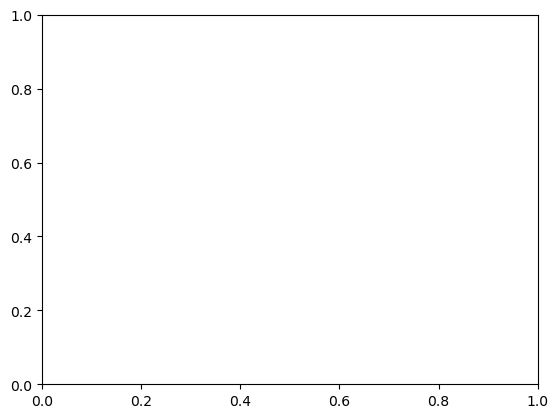

In [189]:
plt.hist(NDI.flatten())

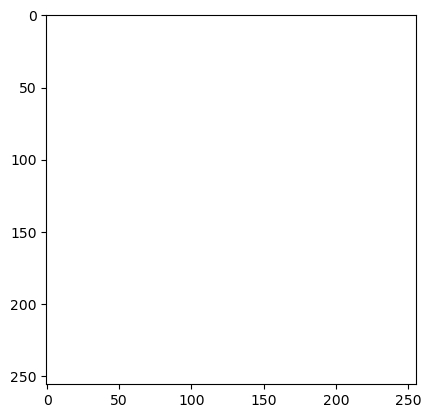

In [191]:
plt.imshow(NDI,cmap='gray')

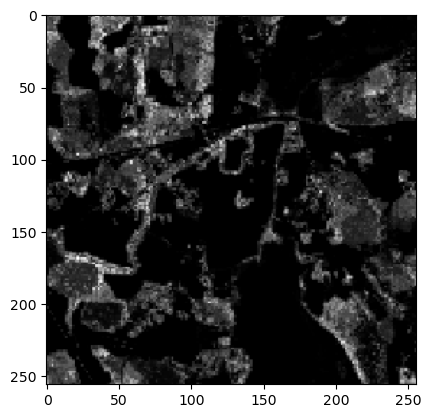

In [192]:
plt.imshow(agbm,cmap='gray')

In [193]:
data_df = pd.DataFrame(chip.reshape((11, 256*256)).T,
                       columns=['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'CLP'])

data_df['ndi'] = NDI.flatten()
data_df['agbm'] = agbm.flatten()


data_df.head()

,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,CLP,ndi,agbm
0,0,0,0,0,0,0,0,0,0,0,255,NaN,148.449997
1,0,0,0,0,0,0,0,0,0,0,255,NaN,148.449997
2,0,0,0,0,0,0,0,0,0,0,255,NaN,218.279999
3,0,0,0,0,0,0,0,0,0,0,255,NaN,218.279999
4,0,0,0,0,0,0,0,0,0,0,255,NaN,184.979996


In [194]:
data_df.corr()[['agbm', 'B7']]

,agbm,B7
B2,NaN,NaN
B3,NaN,NaN
B4,NaN,NaN
B5,NaN,NaN
B6,NaN,NaN
B7,NaN,NaN
B8,NaN,NaN
B8A,NaN,NaN
B11,NaN,NaN
B12,NaN,NaN


<AxesSubplot: xlabel='B7', ylabel='agbm'>

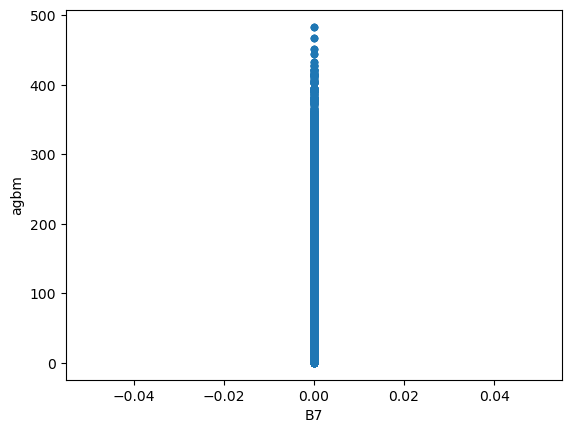

In [195]:
data_df.plot.scatter('B7', 'agbm')

### S1

In [212]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

selected_chip = train_df[(train_df.chip_id=='00efbedd') & (train_df.month=='June') & (train_df.satellite=='S1')]

for idx, row in tqdm(list(selected_chip.iterrows())):
    chip_path = download_train_tif(row.chip_id, row.satellite, row.month, row['size'], row.cksum)
    
    corresponding_agbm = agbm_df[agbm_df.chip_id==row.chip_id]
    
    assert len(corresponding_agbm)==1
    
    aux_filename, aux_chip_id, aux_size, aux_cksum = corresponding_agbm.values[0][0:4]
    agbm_path = download_train_agbm(row.chip_id, aux_size, aux_cksum)

chip = io.imread(chip_path)
chip = np.moveaxis(chip, -1, 0)

agbm = io.imread(agbm_path)

100%|█████████████████████████████████████| 1/1 [00:00<00:00,  4.36it/s]


(array([6.0400e+02, 2.7660e+03, 6.6480e+03, 1.5745e+04, 2.4930e+04,
        1.3555e+04, 1.2040e+03, 5.4000e+01, 2.1000e+01, 9.0000e+00]),
 array([-22.71953583, -20.06355286, -17.40757179, -14.75158882,
        -12.09560585,  -9.43962383,  -6.78364134,  -4.12765884,
         -1.47167659,   1.18430579,   3.84028816]),
 <BarContainer object of 10 artists>)

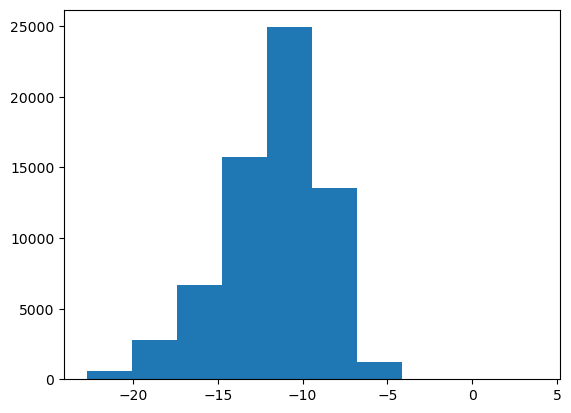

In [213]:
plt.hist(chip[0].flatten())

In [214]:
chip.shape, agbm.shape

((4, 256, 256), (256, 256))

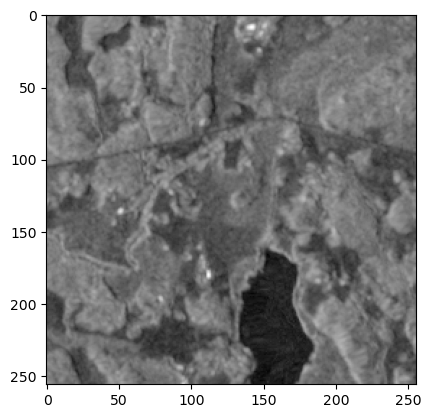

In [215]:
plt.imshow(chip[0],cmap='gray')

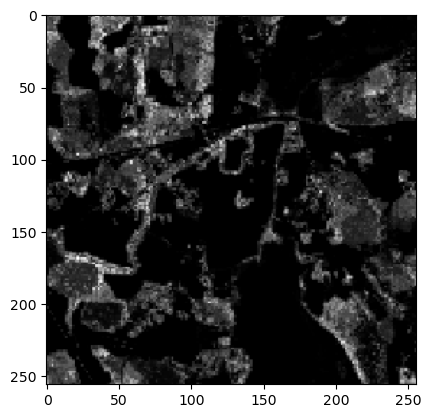

In [216]:
plt.imshow(agbm,cmap='gray')

In [217]:
data_df = pd.DataFrame(chip.reshape((4, 256*256)).T,
                       columns=['VVu', 'VHu', 'VVd', 'VHd'])

data_df['agbm'] = agbm.flatten()


data_df.head()

,VVu,VHu,VVd,VHd,agbm
0,-9.385819,-14.203196,-9.205730,-16.622156,148.449997
1,-9.652325,-13.905048,-9.785695,-17.404058,148.449997
2,-9.583541,-14.816580,-10.243487,-16.893196,218.279999
3,-9.642098,-15.771271,-9.924948,-16.619585,218.279999
4,-10.399052,-17.616655,-9.022127,-16.094683,184.979996


In [218]:
data_df.describe()

,VVu,VHu,VVd,VHd,agbm
count,65536.000000,65536.000000,65536.000000,65536.000000,65536.000000
mean,-11.721357,-17.976372,-11.524803,-18.038450,52.043079
std,2.984237,4.040960,3.155434,3.980756,75.350151
min,-22.719536,-41.911484,-23.181879,-43.477879,0.000000
25%,-13.500996,-19.497890,-13.283499,-19.496157,0.000000
50%,-11.271721,-17.203659,-11.059279,-17.342670,5.550000
75%,-9.594294,-15.309722,-9.410475,-15.581352,89.900002
max,3.840288,-5.519857,8.996764,4.093968,483.140015


In [219]:
data_df.corr()[['agbm']]

,agbm
VVu,0.408084
VHu,0.391838
VVd,0.375582
VHd,0.362908
agbm,1.000000


<AxesSubplot: xlabel='VVu', ylabel='agbm'>

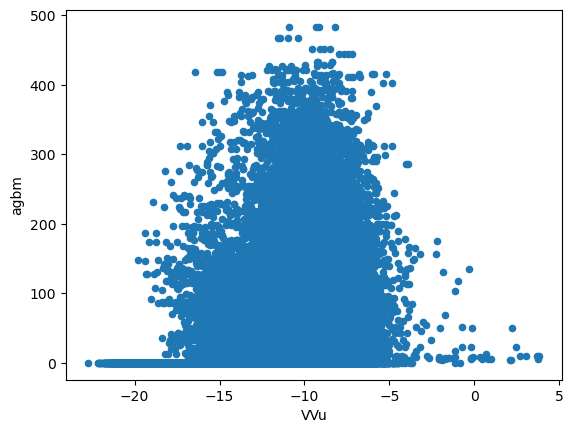

In [220]:
data_df.plot.scatter('VVu', 'agbm')